In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }

<IPython.core.display.Javascript object>

In [2]:
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import LinearSVC

import pandas as pd
from pandas.plotting import scatter_matrix

import mglearn as mg
import numpy as np
import matplotlib.pyplot as plt

# Iris dataset classifier

In [3]:
iris_dataset = load_iris()
print(iris_dataset['DESCR'])
print("Keys of iris_dataset: \n{}\n".format(iris_dataset.keys()))
print("Target names: {}\n".format(iris_dataset['target_names']))
print("Feature names: \n{}\n".format(iris_dataset['feature_names']))
print("Shape of data: {}\n".format(iris_dataset['data'].shape))
print("First 5 columns of data:\n{}\n".format(iris_dataset['data'][:5]))
print("Shape of target: {}\n".format(iris_dataset['target'].shape))
print("Target:\n{}\n".format(iris_dataset['target']))

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)
print("X_train shape: {}, y_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}, y_test shape: {}".format(X_test.shape, y_test.shape))

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
sepal length (cm)    112 non-null float64
sepal width (cm)     112 non-null float64
petal length (cm)    112 non-null float64
petal width (cm)     112 non-null float64
dtypes: float64(4)
memory usage: 3.6 KB


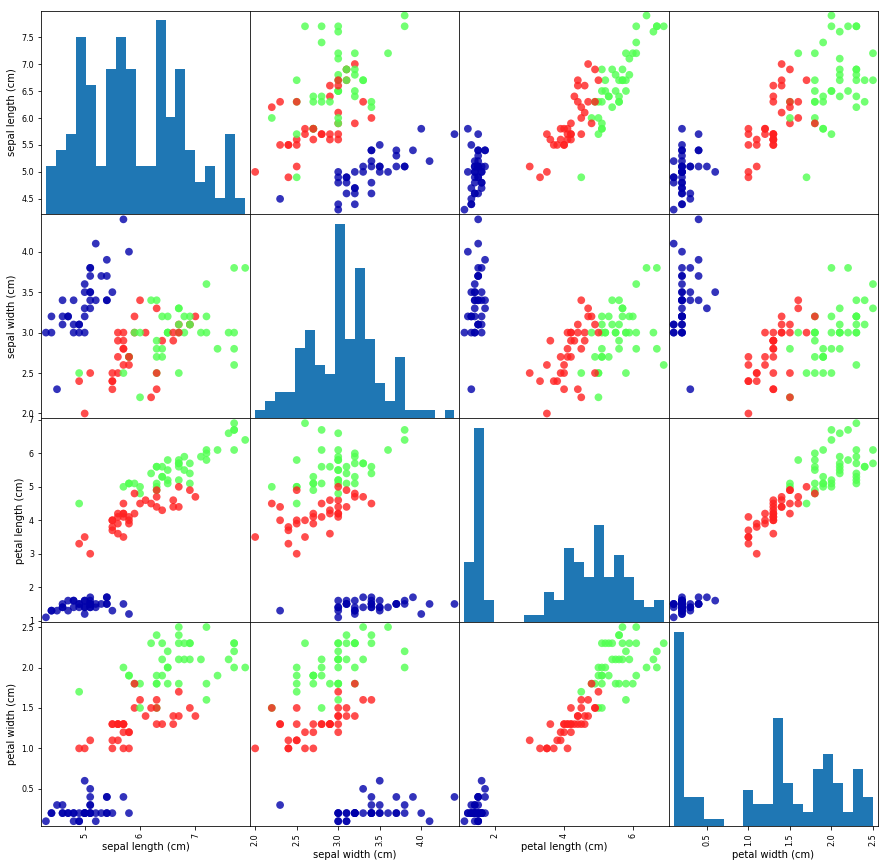

In [4]:
df = pd.DataFrame(X_train, columns=iris_dataset.feature_names) #label columns
df.info()

scatter_matrix(df, c=y_train, figsize=(15,15), marker='o', hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mg.cm3)
plt.show()

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
score = knn.score(X_test, y_test)

print("Test set score: {:.2f}".format(score))
print("Test set predictions:\n{}".format(pred))

Test set score: 0.97
Test set predictions:
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


# k-Nearest Neighbors

## Classifier

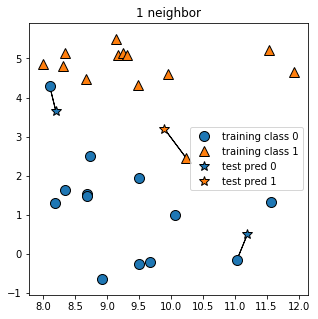

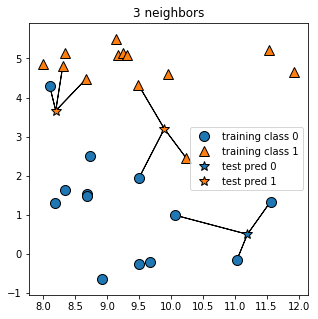

In [6]:
plt.figure(figsize=(5,5))
plt.title("1 neighbor")
mg.plots.plot_knn_classification(n_neighbors=1)
plt.show()

plt.figure(figsize=(5,5))
plt.title("3 neighbors")
mg.plots.plot_knn_classification(n_neighbors=3)
plt.show()

Test set score: 0.86
Test set predictions:
[1 0 1 0 1 0 0]


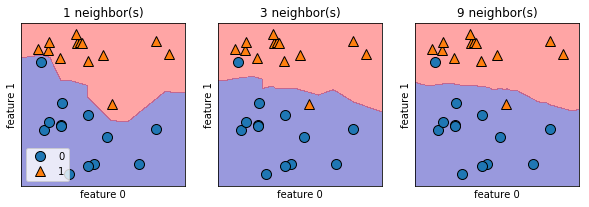

In [7]:
X, y = mg.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

print("Test set score: {:.2f}".format(score))
print("Test set predictions:\n{}".format(pred))

fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mg.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mg.discrete_scatter(X[:,0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)
plt.show()

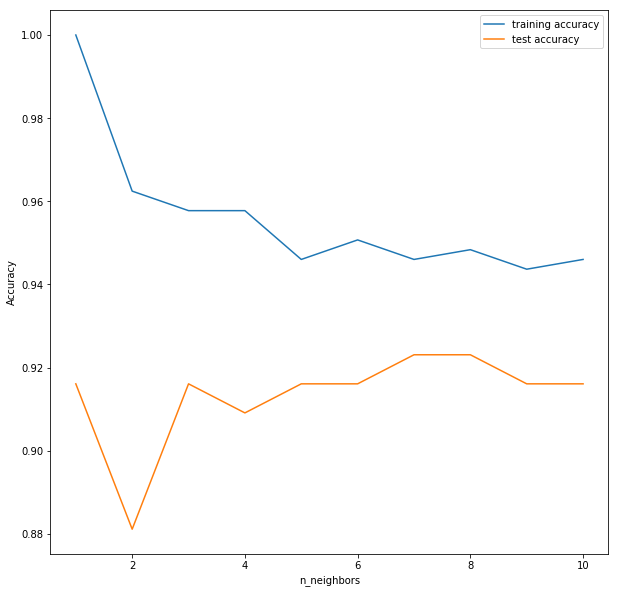

In [8]:
training_acc = []
test_acc = []
neighbors_settings = range(1, 11)

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))
    
plt.figure(figsize=(10,10))
plt.plot(neighbors_settings, training_acc, label="training accuracy")
plt.plot(neighbors_settings, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## Regression

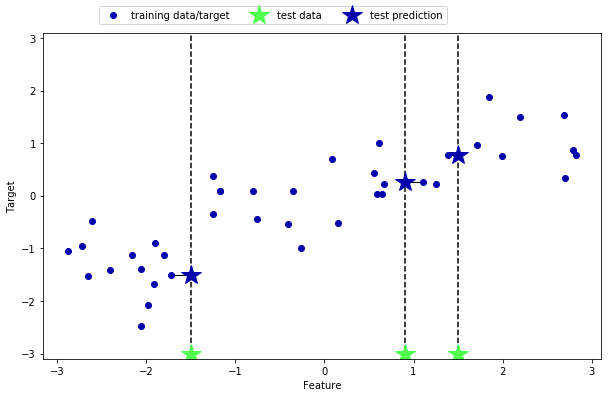

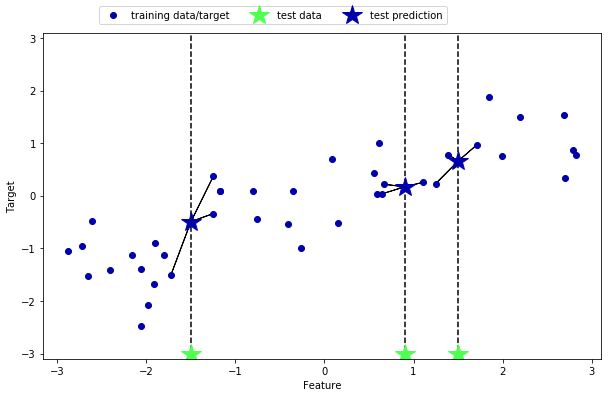

In [9]:
mg.plots.plot_knn_regression(n_neighbors=1)
plt.show()

mg.plots.plot_knn_regression(n_neighbors=3)
plt.show()

In [10]:
X, y = mg.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
score = reg.score(X_test, y_test)

print("Test set R^2: {:.2f}".format(score))
print("Test set predictions:\n{}".format(pred))

Test set R^2: 0.83
Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


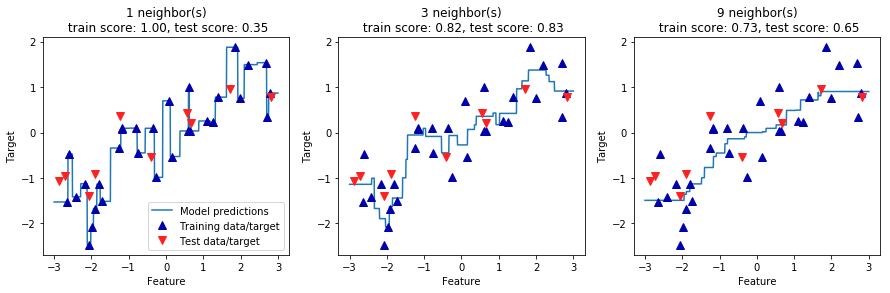

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    pred = reg.predict(line)
    score = reg.score(X_test, y_test)
    
    ax.plot(line, pred)
    ax.plot(X_train, y_train, '^', c=mg.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mg.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f}, test score: {:.2f}"
                 .format(n_neighbors, reg.score(X_train, y_train), score))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

# Linear Models

w[0]: 0.393906  b: -0.031804


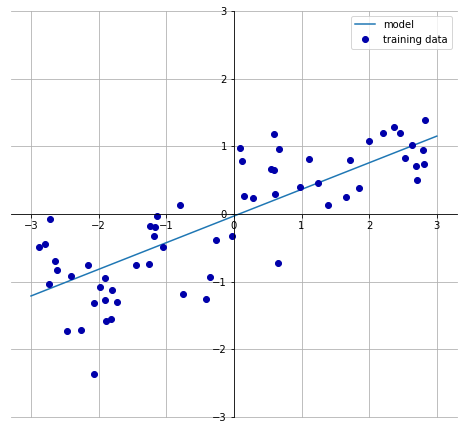

In [12]:
mg.plots.plot_linear_regression_wave()
plt.show()

## Linear Regression (ordinary least squares OLS)

In [13]:
X, y = mg.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
score_training = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))

lr.coef_: [ 0.39390555]
lr.intercept_: -0.03180434302675973
Training set score: 0.67
Test set score: 0.66


In [14]:
X, y = mg.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
score_training = lr.score(X_train, y_train)
score_test = lr.score(X_test, y_test)

print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))

Training set score: 0.95
Test set score: 0.61


## Ridge Regression

In [15]:
ridge = Ridge().fit(X_train, y_train)
score_training = ridge.score(X_train, y_train)
score_test = ridge.score(X_test, y_test)

print("alpha=1")
print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
score_training_10 = ridge10.score(X_train, y_train)
score_test_10 = ridge10.score(X_test, y_test)

print("\nalpha=10")
print("Training set score: {:.2f}".format(score_training_10))
print("Test set score: {:.2f}".format(score_test_10))

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
score_training_01 = ridge01.score(X_train, y_train)
score_test_01 = ridge01.score(X_test, y_test)

print("\nalpha=0.1")
print("Training set score: {:.2f}".format(score_training_01))
print("Test set score: {:.2f}".format(score_test_01))

alpha=1
Training set score: 0.89
Test set score: 0.75

alpha=10
Training set score: 0.79
Test set score: 0.64

alpha=0.1
Training set score: 0.93
Test set score: 0.77


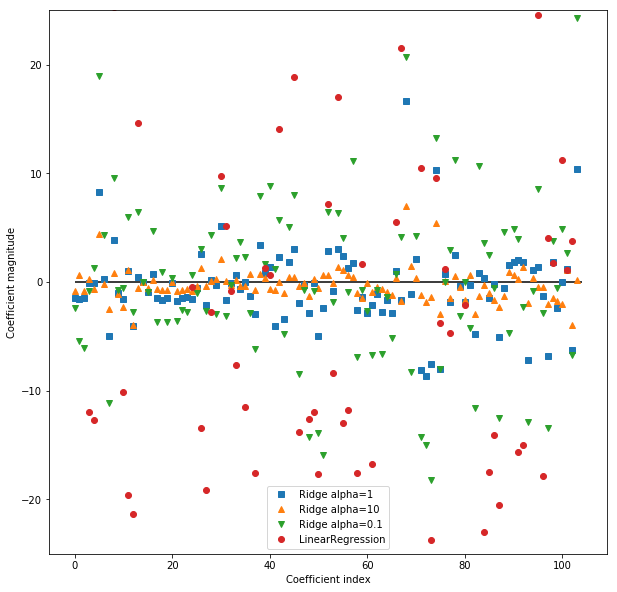

In [16]:
plt.figure(figsize=(10,10))

plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

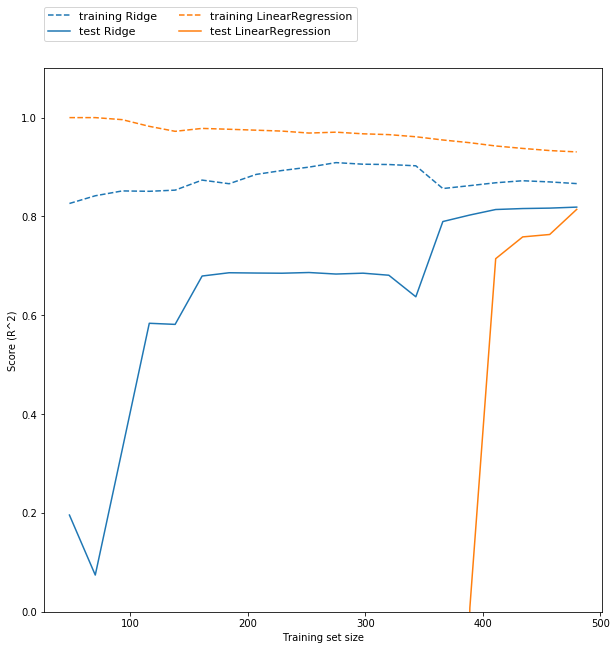

In [17]:
plt.figure(figsize=(10,10))
mg.plots.plot_ridge_n_samples()
plt.show()

## Lasso

In [18]:
lasso = Lasso().fit(X_train, y_train)
score_training = lasso.score(X_train, y_train)
score_test = lasso.score(X_test, y_test)

print("alpha=1")
print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
score_training = lasso001.score(X_train, y_train)
score_test = lasso001.score(X_test, y_test)

print("\nalpha=0.01")
print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
score_training = lasso00001.score(X_train, y_train)
score_test = lasso00001.score(X_test, y_test)

print("\nalpha=0.0001")
print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

alpha=1
Training set score: 0.29
Test set score: 0.21
Number of features used: 4

alpha=0.01
Training set score: 0.90
Test set score: 0.77
Number of features used: 4

alpha=0.0001
Training set score: 0.95
Test set score: 0.64
Number of features used: 4


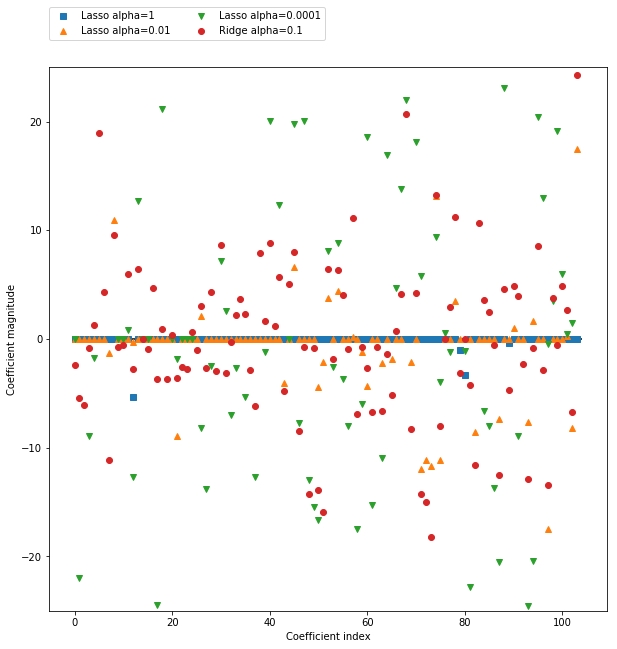

In [19]:
plt.figure(figsize=(10,10))

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0, 1.05))
plt.show()

## LogisticRegression & LinearSVC

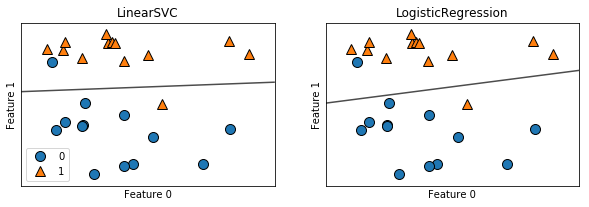

In [20]:
X, y = mg.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mg.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mg.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
axes[0].legend()
plt.show()

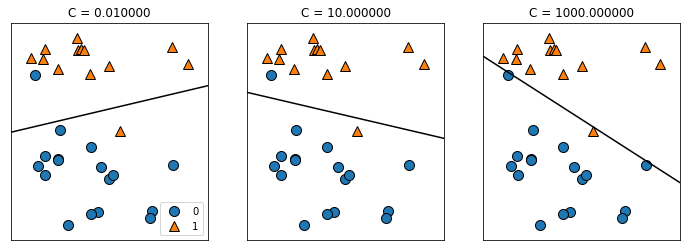

In [21]:
mg.plots.plot_linear_svc_regularization()
plt.show()

In [22]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression().fit(X_train, y_train)
score_training = logreg.score(X_train, y_train)
score_test = logreg.score(X_test, y_test)

print("C=1")
print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))

logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
score_training = logreg100.score(X_train, y_train)
score_test = logreg100.score(X_test, y_test)

print("\nC=100")
print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
score_training = logreg001.score(X_train, y_train)
score_test = logreg001.score(X_test, y_test)

print("\nC=100")
print("Training set score: {:.2f}".format(score_training))
print("Test set score: {:.2f}".format(score_test))

C=1
Training set score: 0.95
Test set score: 0.96

C=100
Training set score: 0.97
Test set score: 0.97

C=100
Training set score: 0.93
Test set score: 0.93


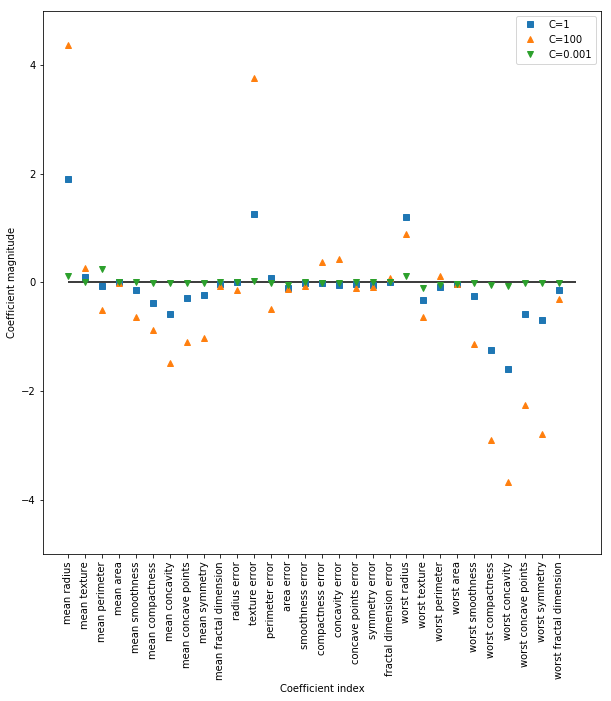

In [23]:
plt.figure(figsize=(10,10))

plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.legend()
plt.show()

Training accuracy of L1 logreg with C=0.001: 0.91
Test accuracy of L1 logreg with C=0.001: 0.92
Training accuracy of L1 logreg with C=1.000: 0.96
Test accuracy of L1 logreg with C=1.000: 0.96
Training accuracy of L1 logreg with C=100.000: 0.99
Test accuracy of L1 logreg with C=100.000: 0.98


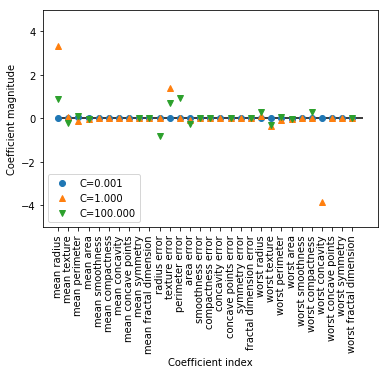

In [24]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    score_training = lr_l1.score(X_train, y_train)
    score_test = lr_l1.score(X_test, y_test)
    
    print("Training accuracy of L1 logreg with C={:.3f}: {:.2f}".format(C, score_training))
    print("Test accuracy of L1 logreg with C={:.3f}: {:.2f}".format(C, score_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()